## Carregando os dados

In [163]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [164]:
df = pd.read_csv('spotify.csv', encoding='latin-1') 
# O encoding mapeia todos os valores de bytes possíveis para os primeiros 256 pontos de código Unicode e, assim, 
# garante que erros de decodificação nunca ocorrerão, independentemente do manipulador de erros configurado.

In [165]:
#Visualizando o dataframe
df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


## Análise Exploratória - Resumo Estatístico


In [166]:
df.shape

(953, 24)

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [168]:
df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [169]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

Pela análise exploratória é possível perceber alguns erros no dataser que podem, posteriormente, atrapalhar nossas análises. 
As colunas 'in_shazam_charts' e 'key' apresentam valores nulos.


Já colunas como 'streams', 'in_shazam_charts' e 'in_deezer_playlists' estão sendo tratadas como objeto, quando na verdade elas deveriam ser tratadas como número.

As colunas 'realesed_years', 'realesed_month' e 'realesed_day' estão sendo tratados como inteiro

In [170]:
# Fazendo alteração na coluna 'artist(s)_name', pois os caractere '()' atrapalha em futuras linhas de código
df.rename(columns = {'artist(s)_name':'NAME'}, inplace = True)

In [171]:
# preenchendo valores ausentes
df['in_shazam_charts'].fillna(value = 'No Record', inplace = True)
df['key'].fillna(value = 'No Record', inplace = True)
df['streams'].fillna(value = 'No Record', inplace = True)

In [172]:
# Transformando as colunas que estão sendo tratadas pelo tipo errado
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')
df['in_shazam_charts'] = pd.to_numeric(df['in_shazam_charts'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')

In [174]:
# Juntando as colunas 'released_year', 'released_month' e 'released_day' em apenas um chamada Data
df['released_date'] ='' 
for i in range(953):
    df.released_date.values[i] = f'{df.released_year.values[i]}-{df.released_month.values[i]}-{df.released_day.values[i]}'
df['released_date'] = pd.to_datetime(df['released_date'])

In [175]:
# Apagando colunas anteriores
df = df.drop(['released_year'], axis=1)
df = df.drop( ['released_month'],axis=1)
df = df.drop(['released_day'], axis=1)


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   track_name            953 non-null    object        
 1   NAME                  953 non-null    object        
 2   artist_count          953 non-null    int64         
 3   in_spotify_playlists  953 non-null    int64         
 4   in_spotify_charts     953 non-null    int64         
 5   streams               952 non-null    float64       
 6   in_apple_playlists    953 non-null    int64         
 7   in_apple_charts       953 non-null    int64         
 8   in_deezer_playlists   874 non-null    float64       
 9   in_deezer_charts      953 non-null    int64         
 10  in_shazam_charts      896 non-null    float64       
 11  bpm                   953 non-null    int64         
 12  key                   953 non-null    object        
 13  mode                

## Analisando os dados

#### Pergunta 1: Qual artista é mais recorrente na base de dados

In [138]:
#Adicionando um tema aos gráficos do Seaborn
sns.set_theme(style="darkgrid")

In [156]:
# Realizando a contagem dos 10 nomes mais recorrentes na database
artist = df['NAME'].value_counts().head(10)

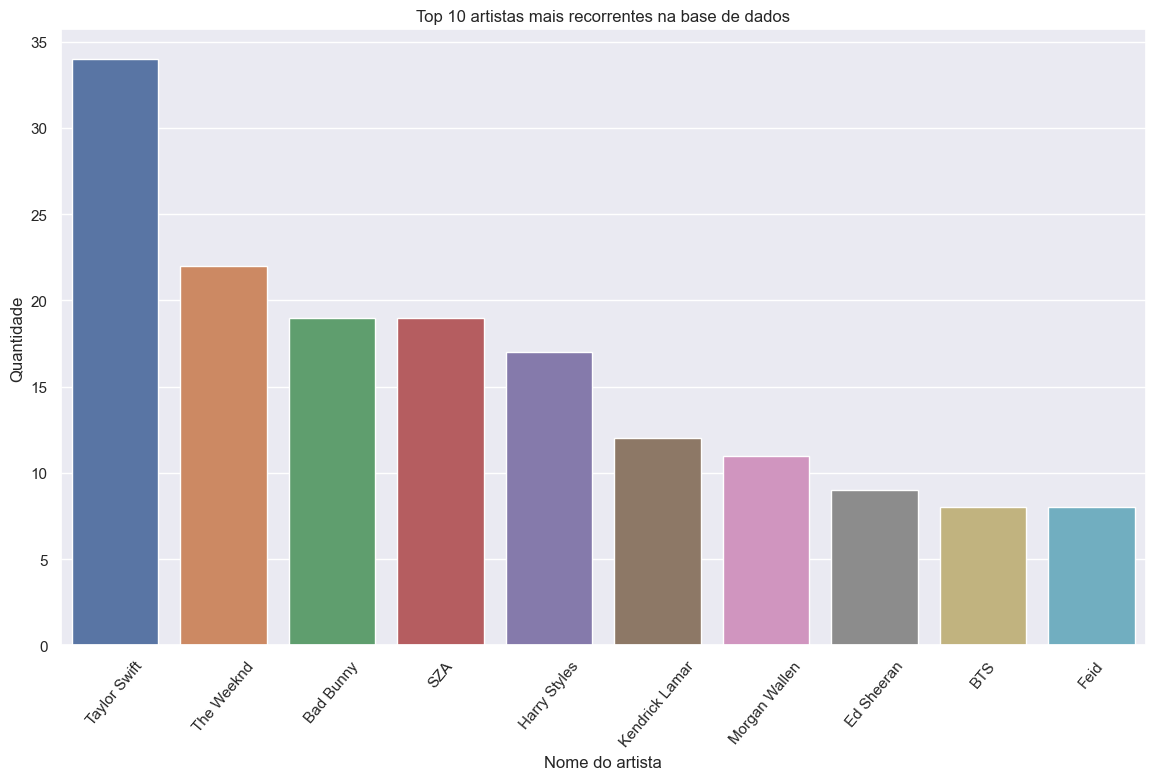

In [157]:
# Plotando em gráfico de barras
plt.figure(figsize=(14, 8))
sns.barplot(x = artist.index, y = artist)
plt.xticks(rotation=50)
plt.title("Top 10 artistas mais recorrentes na base de dados")
plt.xlabel("Nome do artista")
plt.ylabel("Quantidade")
plt.show()



#### Pergunta 2: Artistas com mais stream

In [141]:
# Agruando pelo nome dos artistas e realizando a soma da variavel streams
artist_stream = df[['NAME', 'streams']].groupby(['NAME']).sum()

In [142]:
# Ordenando do maior para o menor e selecionando os 10 primeiros
top10artist = artist_stream.sort_values(by = 'streams', ascending=False).head(10)

In [143]:
# Padronizando os dados (na casa dos bilhões)
top10artist = top10artist/1000000000

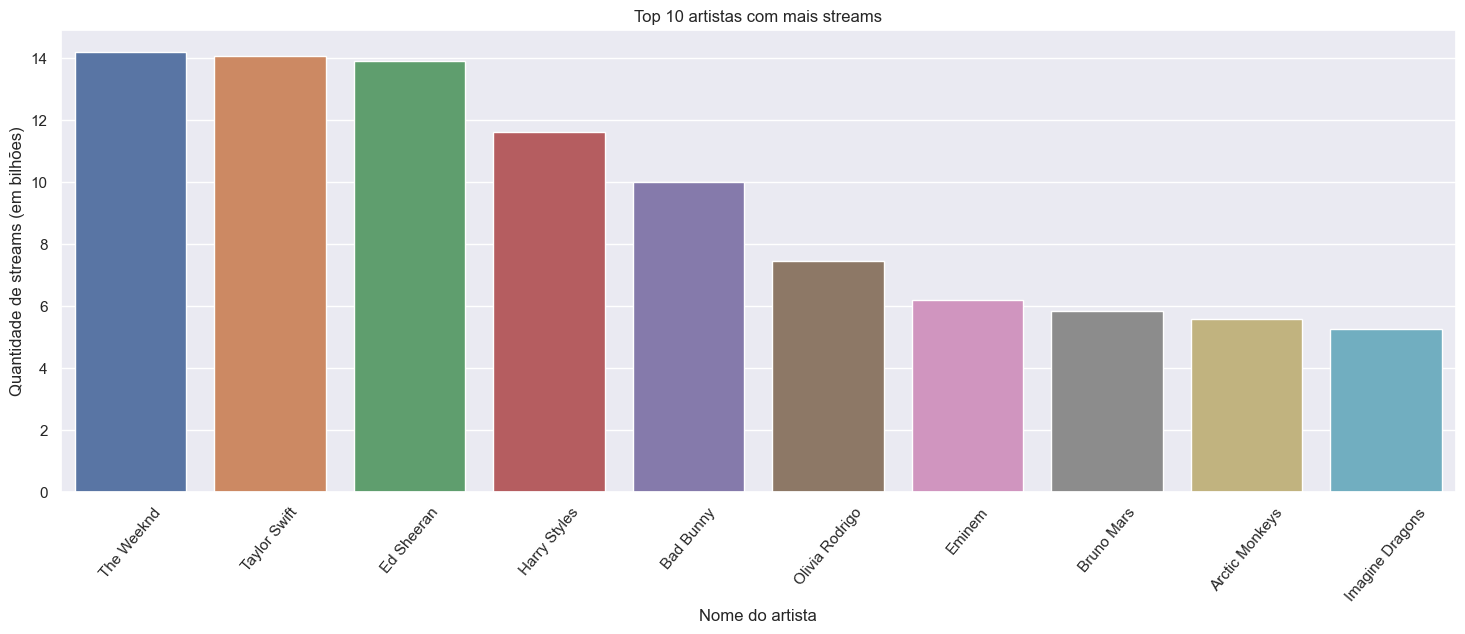

In [144]:
# Plotando em gráfico de barras
plt.figure(figsize=(18,6))
gphart = sns.barplot(x=top10artist.index, y=top10artist.streams.values)
plt.xticks( rotation=50)
plt.title("Top 10 artistas com mais streams")
plt.xlabel("Nome do artista")
plt.ylabel("Quantidade de streams (em bilhões)")
plt.show()


#### Pergunta 3: Quais músicas possuem mais stream?


In [145]:
# Agruando pelo nome das músicas e realizando a soma da variavel streams
music_stream = df[['track_name', 'streams']].groupby(['track_name']).sum()

In [146]:
# Ordenando do maior para o menor e selecionando os 10 primeiros
top10music = music_stream.sort_values(by = 'streams', ascending=False).head(10)

In [147]:
# Padronizando os dados (na casa dos bilhões)
top10music = top10music/10000000

In [148]:
# Criando uma list para armazenar o nome dos artistas responsáveis pela música
artisttrack = []
for i in range (10):
    artisttrack.append(df[(df.track_name == top10music.index[i])].NAME.values[0])

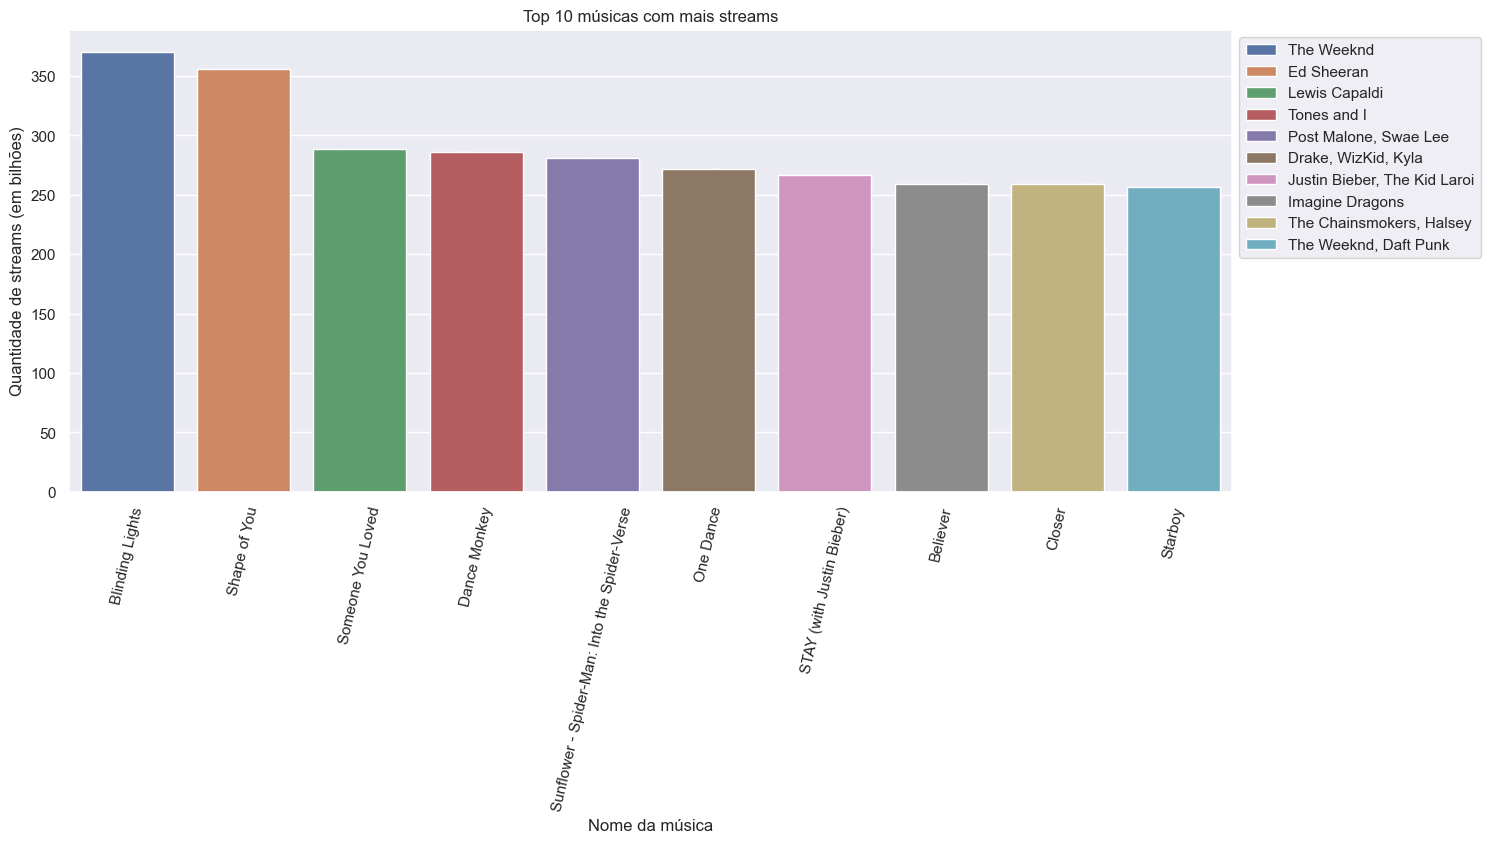

In [149]:
# Plotando em gráfico de barras
plt.figure(figsize=(15,6))
gphmus = sns.barplot(x=top10music.index, y=top10music.streams.values,  hue=artisttrack)
gphmus2 = sns.barplot(x=top10music.index, y=top10music.streams.values)
gphmus.legend(bbox_to_anchor= (1,1))
plt.xticks( rotation= 77)
plt.title("Top 10 músicas com mais streams")
plt.xlabel("Nome da música")
plt.ylabel("Quantidade de streams (em bilhões)")
plt.show()

#### Pergunta 4: Top 10 músicas presentes em playlist do Apple, Spotify e Deezer 

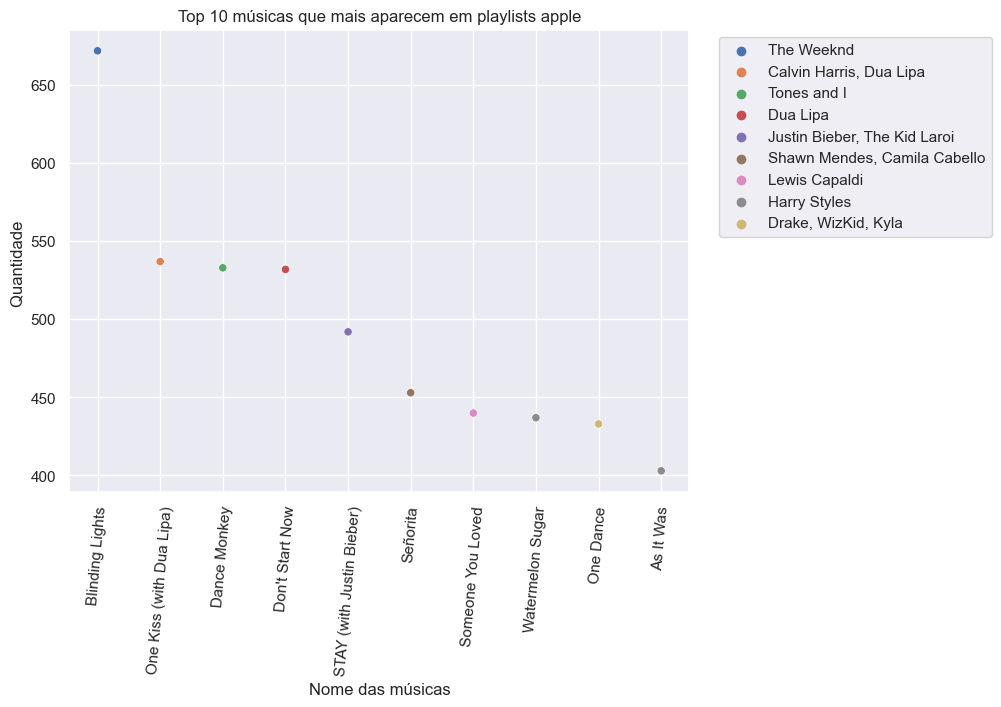

In [160]:
#Selecionando apenas as colunas do nome da música e da apple playlists
playlist = df[['track_name', 'in_apple_playlists']]
top10playlists = playlist.sort_values(by='in_apple_playlists', ascending=False).head(10)
df['track_name'] = df['track_name'].str.replace('Seï¿½ï¿½o', 'Señorita')
artisttrack = []
for i in range (10):
    artisttrack.append(df[(top10playlists.track_name.values[i] == df.track_name)].NAME.values[0])
plt.figure(figsize = ( 8 , 6 )) 
g3 = sns.scatterplot( data=top10playlists, x="track_name", y="in_apple_playlists", hue = artisttrack ) 
g3.legend(bbox_to_anchor= (1.5,1))
plt.xticks( rotation=85)
plt.title("Top 10 músicas que mais aparecem em playlists apple")
plt.xlabel("Nome das músicas") 
plt.ylabel("Quantidade ")
plt.show() 

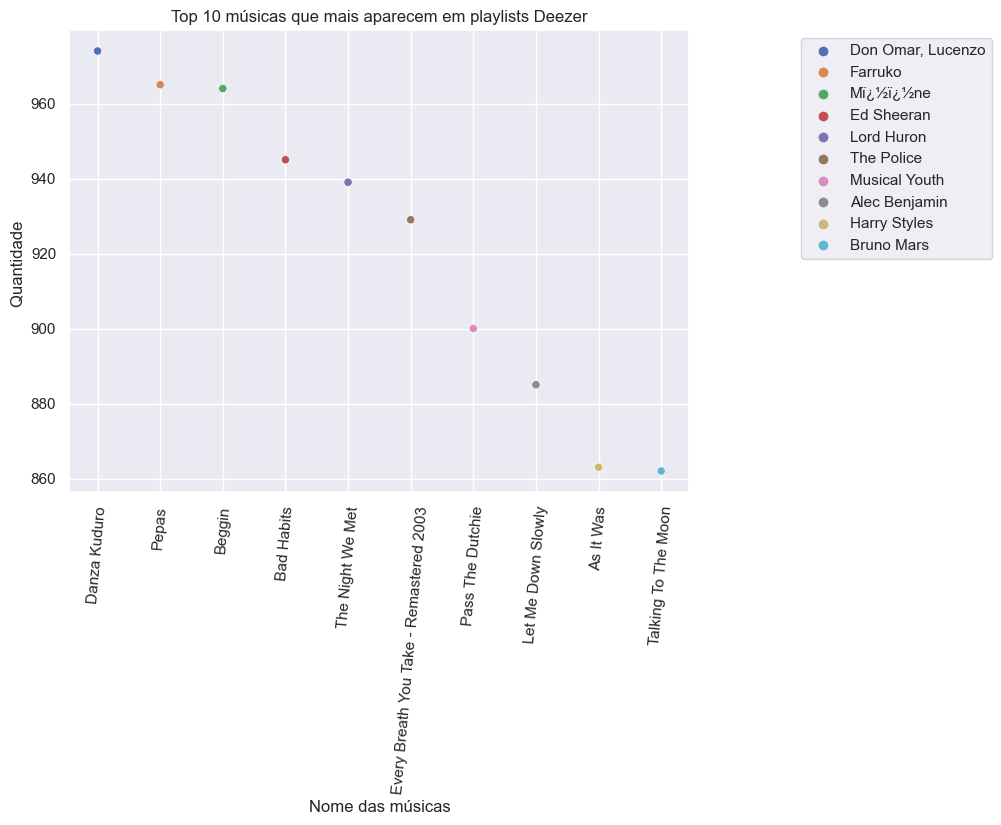

In [152]:
playlist = df[['track_name', 'in_deezer_playlists']]
top10playlists = playlist.sort_values(by='in_deezer_playlists', ascending=False).head(10)
artisttracks = []
for i in range (10):
    artisttrack.append(df[(top10playlists.track_name.values[i] == df.track_name)].NAME.values[0])
df['track_name'] = df['track_name'].str.replace('Mï¿½ï¿½ne', 'Måneskin')
plt.figure(figsize = ( 8 , 6 )) 
g3 = sns.scatterplot( data=top10playlists, x="track_name", y="in_deezer_playlists", hue = artisttracks ) 
g3.legend(bbox_to_anchor= (1.5,1))
plt.xticks( rotation=85)
plt.title("Top 10 músicas que mais aparecem em playlists Deezer")
plt.xlabel("Nome das músicas") 
plt.ylabel("Quantidade ")
plt.show() 

#### Analisando os recursos de Áudio ao longo do tempo

In [177]:
#Criando a coluna ano
df['Ano'] = df['released_date'].dt.year

In [178]:
# Criando um dataframe apenas com os recursos
recursos = pd.DataFrame(df, columns=['danceability_%','valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%'])

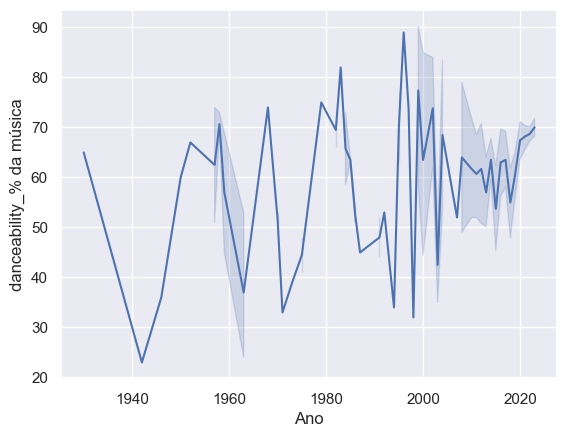

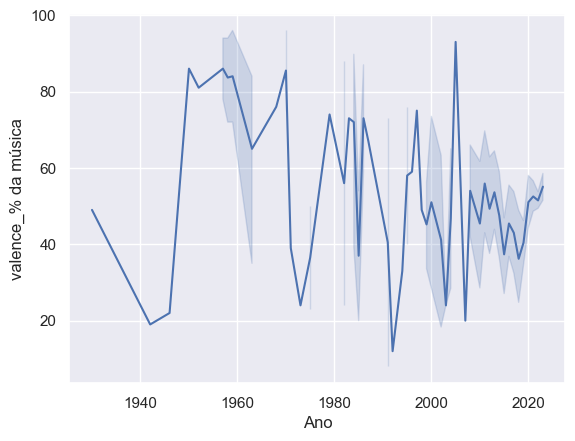

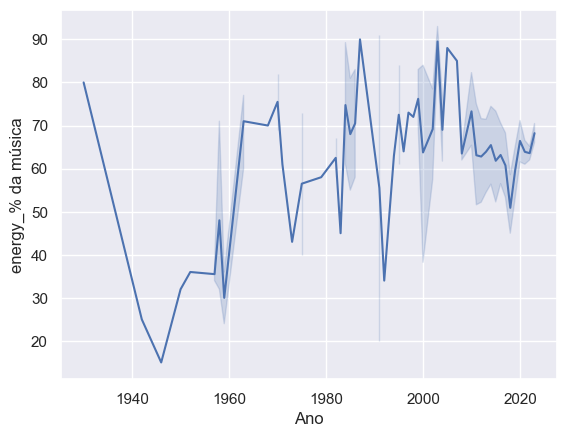

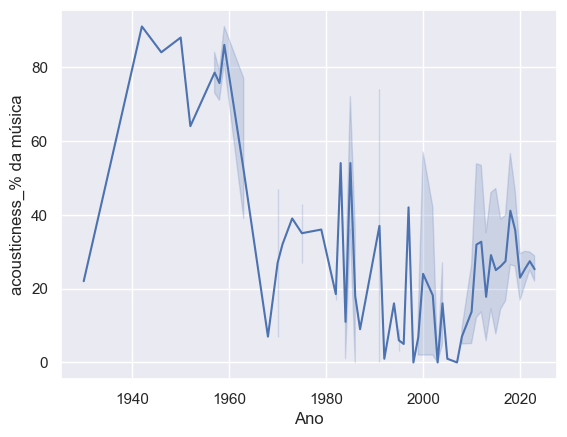

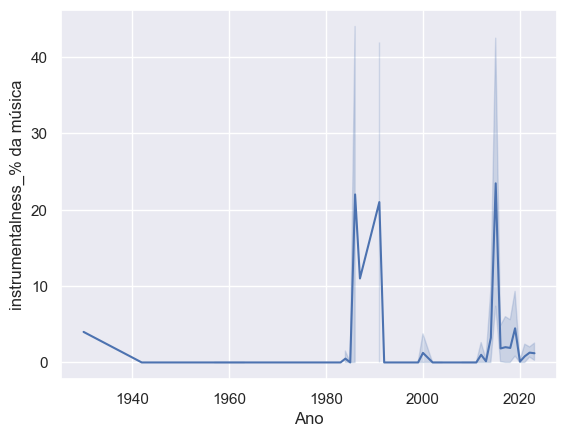

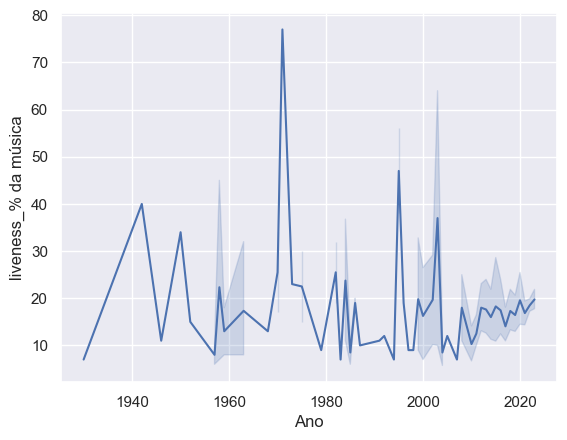

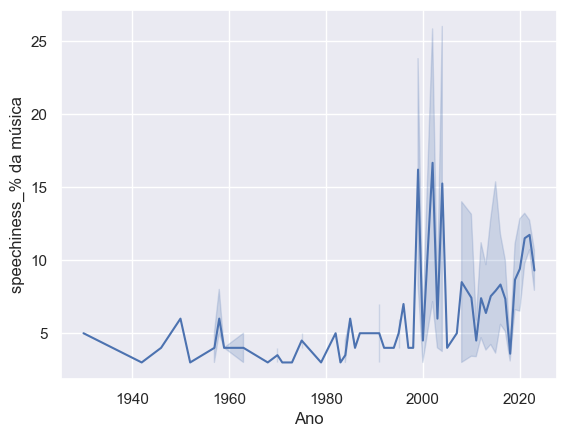

In [179]:
# Plotando os gráficos
for i in recursos:
    sns.lineplot(data=df, x="Ano", y=i, )
    plt.ylabel(f'{i} da música')
    plt.show()  